<a href="https://colab.research.google.com/github/AbuKaisar24/Bengali-Sentence-Similarity-Measurement-for-Text-Summarization/blob/master/Bengali_Sentence_Similarity_Prediction_For_Text_Summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
df = pd.read_excel("gdrive/My Drive/Colab Notebooks/newdata.xlsx",encoding='utf-8')

In [0]:
df.head()
df=df.drop("Post Type",axis=1)

In [0]:
df.isnull().sum()

Text       0
Summary    0
dtype: int64

In [0]:
for i in range(15,20):
    print("News:",i+1)
    print("Text:",df.Text[i])
    print("Summary:",df.Summary[i])

News: 16
Text: প্রয়োজন সবার আগে উচ্চ গতি সম্পন্ন, নিরবিচ্ছিন্ন ইন্টারনেট।প্রত্যেকটি ডিজিটাল সেন্টারে উচ্চ গতি সম্পন্ন, নিরবিচ্ছিন্ন ইন্টারনেট কানেকশনের মাধ্যমে এলাকা ভিত্তিক উদ্যোক্তাসহ আরো শত শত তরুন তরুণীর কর্মসংস্থা্র ব্যবস্থা হবে। ডিজিটাল সেন্টার উদ্যোক্তা সম্মেলনে প্রতিমন্ত্রী জুনাইদ আহমেদ পলক।
Summary: শত শত তরুন তরুণীর কর্মসংস্থা্র ব্যবস্থা হবে।
News: 17
Text: আমি এটুকুই চাইব এই অবহেলিত জনগোষ্ঠী যেন আর অবহেলার শিকার না হয়। - প্রধানমন্ত্রী শেখ হাসিনা পর্যায়ক্রমে দেশের আটটি বিভাগীয় শহরে বৃহৎ পরিসরে পিতামাতা ও অভিভাবকহীন নিউরো-ডেভেলপমেন্টাল প্রতিবন্ধী মেয়েদের জন্য পরিচর্যা কেন্দ্র স্থাপন করা হবে। এসব কেন্দ্রে তাদের শিক্ষা, প্রশিক্ষণ, চিকিৎসা, খেলাধুলাসহ সব সুবিধা অন্তর্ভুক্ত থাকবে।
Summary: প্রতিবন্ধী মেয়েদের জন্য পরিচর্যা কেন্দ্র স্থাপন করা হবে।
News: 18
Text: ১৯৭৫ সালের ৪ এপ্রিল দুই মার্কিন কম্পিউটার প্রকৌশলী বিল গেটস এবং পল অ্যালেনের উদ্যোগে প্রতিষ্ঠিত হয় মাইক্রোসফট। মূলত নিজেদের তৈরি কম্পিউটার প্রোগ্রাম বিক্রির জন্যই যৌথভাবে প্রতিষ্ঠান খুলে বসেন গেটস ও অ্যালেন।
Summary: বিল গেট

In [0]:
contractions = { 
"বি.দ্র ": "বিশেষ দ্রষ্টব্য",
"ড.": "ডক্টর",
"ডা.": "ডাক্তার",
"ইঞ্জি:": "ইঞ্জিনিয়ার",
"রেজি:": "রেজিস্ট্রেশন",
"মি.": "মিস্টার",
"মু.": "মুহাম্মদ",
"মো.": "মোহাম্মদ",
}

In [0]:
import re
import string
def clean_text(text,remove_stopwords = False):
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    # Format words and remove unwanted characters
    whitespace = re.compile(u"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a]+", re.UNICODE)
    bangla_digits = u"[\u09E6\u09E7\u09E8\u09E9\u09EA\u09EB\u09EC\u09ED\u09EE\u09EF]+"
    english_chars = u"[a-zA-Z0-9]"
    punc = u"[(),$%^&*+={}\[\]:\"|\'\~`<>/,¦!?½£¶¼©⅐⅑⅒⅓⅔⅕⅖⅗⅘⅙⅚⅛⅜⅝⅞⅟↉¤¿º;-]+"
    bangla_fullstop = u"\u0964"     #bangla fullstop(dari)
    punctSeq   = u"['\"“”‘’]+|[.?!,…]+|[:;]+"
    
    text = re.sub(bangla_digits, " ", text)
    text = re.sub(punc, " ", text)
    text = re.sub(english_chars, " ", text)
    text = re.sub(bangla_fullstop, " ", text)
    text = re.sub(punctSeq, " ", text)
    text = whitespace.sub(" ", text).strip()
    
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;‘:‘ ’', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]। ,', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    text = re.sub(r"[\@$#%~+-\.\'।\"]"," ",text)
    text = re.sub(r"(?m)^\s+", "", text)
    text = re.sub("[()]","",text)
    text = re.sub("[‘’]","",text)
    text = re.sub("[!]","",text)
    text = re.sub("[/]","",text)
    text = re.sub("[:]","",text)
    text= re.sub('\ |\?|\.|\!|\/|\;|\:', ' ',text)
    text= text.strip("/")
    
    if remove_stopwords:
        k = []
        with open('gdrive/My Drive/Colab Notebooks/Banglastopword.txt', 'r',encoding="utf-8") as f:
            for word in f:
                word = word.split()
                k.append(word[0])
            text = [t for t in text if t not in k]
            text = "".join(text)
            
    return text

In [0]:
def process_questions(text_list, texts, texts_list_name):
  
    for text in texts:
        text_list.append(clean_text(text))
        if len(text_list) % 10000 == 0:
            progress = len(text_list)/len(df) * 100
            print("{} is {}% complete.".format(text_list_name, round(progress, 1)))

In [0]:
Text1 = []     
process_questions(Text1, df.Text, "Text")

Summary1 = []     
process_questions(Summary1, df.Summary, "Summary")

print()

In [0]:
for i in range(5):
    print(Text1[i])
    print(Summary1[i])
    print()

আগে যখন আমি ফুটবল বুঝতাম না ও দেখতাম না তখন ভাবতাম মেসিই সেরা তারপর যখন আমি ফুটবল বোঝা ও দেখা শুরু করলাম তখন উপলব্ধি করলাম যে আগে আমি ভুল ছিলাম না
মেসি সবার সেরা

অগ্নিকান্ডের সময় আমাদের করণীয় তো আমরা সবাই জানি কিন্তু আমরা কি জানি যেকোনো অগ্নিকান্ডের সময় দুর্ঘটনাস্থলে উপস্থিত থাকা সাধারণ জনগনের করণীয় কি চলুন জেনে নেই দুর্ঘটনাস্থলে উপস্থিত থাকা সাধারণ জনগনের করণীয়গুলো প্রয়োজনীয় কিছু পদক্ষেপ গ্রহন করে মূল্যবান জীবন বাঁচাই
অগ্নিকান্ডের সময় উপস্থিত জনগণের করণীয়

ড্যাফোডিলের মেইন ক্যাম্পাসটারে ধানমন্ডি থেইকা গাবতলী ট্রান্সফারের জন্য একটা সিরিয়াস আন্দোলন দরকার সেমিস্টার যাবত এই জ্যামের জন্য ঃ টার একটা ক্লাস ও করতে পারি না মজার রোড থেইক্কা কল্যাণপুর আসতেই লাগলো ঘণ্টা এতো সুন্দর জীবন দিয়া কি করবো যদি এক্সাম মিস হয়
জ্যামের জন্য এক্সাম মিস

পাইপ বয় নাঈমকে খালেদা জিয়ার বিরুদ্ধে কথাটি শিখিয়ে দেয়া হয়েছে দাবী তার মায়ের বললেন ডলার পুরস্কার ঘোষনাকারী সামী তবে নাঈম তার ভুল বুঝতে পারায় শেষ পর্যন্ত টাকা দেয়া হচ্ছে তাকে
নাঈমকে টাকা দেয়া হচ্ছে

সাংবাদিক উজ্জ্বল সে একজন প্রতারক সামন্য অর্থের প্রয়োজনে সে মা

In [0]:
import gensim
from gensim.models import KeyedVectors
from gensim.utils import simple_preprocess

In [0]:
model = gensim.models.KeyedVectors.load_word2vec_format('gdrive/My Drive/Colab Notebooks/bn_w2v_model.text')
#two sample sentences 
s1 = 'ঘূর্ণিঝড় ফণী আয়তনে বাংলাদেশের চেয়ে বড়'#human Summary
s2 = 'ঘূর্ণিঝড় ফণী বাংলাদেশের থেকে বড়'#Response Summary


#calculate distance between two sentences using WMD(Word Mover’s Distance)algorithm
distance = model.wmdistance(s1, s2)

print ('distance = %.3f' % distance)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning:

This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function



distance = 0.987


In [0]:
s1 = s1.split()
s2 = s2.split()

print(s1,s2)
#calculate distance between two sentences using WMD(Word Mover’s Distance)algorithm
distance = model.wmdistance(s1, s2)

print ('distance = %.3f' % distance)

['ঘূর্ণিঝড়', 'ফণী', 'আয়তনে', 'বাংলাদেশের', 'চেয়ে', 'বড়'] ['ঘূর্ণিঝড়', 'ফণী', 'বাংলাদেশের', 'থেকে', 'বড়']
distance = 1.229


W0615 19:20:55.809238 139631731283840 base_any2vec.py:1386] under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



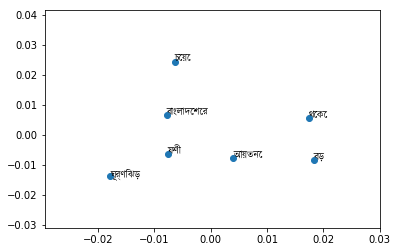

In [0]:

from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
import matplotlib.font_manager as fm

sentences = [s1,s2]

model2 = Word2Vec(sentences, min_count=1)

X = model2[model2.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

pyplot.scatter(result[:, 0], result[:, 1])
words = list(model2.wv.vocab)
prop = fm.FontProperties(fname='gdrive/My Drive/Colab Notebooks/kalpurush.ttf')
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]),fontproperties=prop)
pyplot.show()

In [0]:
s3='জীবনটাকে জটিল করার কি দরকার একটা সরল সমীকরণ মাত্র'
s4='জীবনটাকে জটিল করার কি দরকার'
distance = model.wmdistance(s3, s4)

print ('distance = %.3f' % distance)

distance = 1.117


W0615 19:45:35.523272 139631731283840 base_any2vec.py:1386] under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



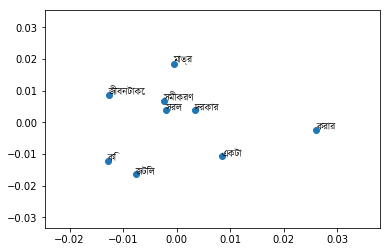

In [0]:

from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
import matplotlib.font_manager as fm

sentences = [s3.split(),s4.split()]

model2 = Word2Vec(sentences, min_count=1)

X = model2[model2.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

pyplot.scatter(result[:, 0], result[:, 1])
words = list(model2.wv.vocab)
prop = fm.FontProperties(fname='gdrive/My Drive/Colab Notebooks/kalpurush.ttf')
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]),fontproperties=prop)
pyplot.show()

In [0]:
s5='আন্দোলন করার জন্য স্কুল কলেজ বন্ধ করার দরকার হয় না'
s6='আন্দোলন করার জন্য স্কুল কলেজ বন্ধ'
distance = model.wmdistance(s5, s6)

print ('distance = %.3f' % distance)


distance = 1.165


In [0]:
distance = model.wmdistance(s2, s4.split())
print(distance)

3.753669551625824


In [0]:
distance = model.wmdistance(s1, s4.split())
print(distance)

3.8827486448475432


In [0]:
from gensim.similarities import WmdSimilarity
num_best = 4
st=WmdSimilarity(Summary1,model,num_best=4)

s='ঘূর্ণিঝড় ফণী আয়তনে বাংলাদেশের চেয়ে বড়'
q= clean_text(s)
st[q]

[(81, 1.0),
 (37, 0.7159740421062721),
 (69, 0.6916249186691728),
 (30, 0.6880664606976791)]

In [0]:
q2='ঘূর্ণিঝড় ফণী বাংলাদেশের থেকে বড়'
st[q2]

[(81, 0.8305251937100089),
 (69, 0.70057203708213),
 (29, 0.6862317867670649),
 (37, 0.6852327915979789)]

In [0]:
from gensim.similarities import WmdSimilarity
st=WmdSimilarity(Text1,model,num_best=10)
q3='জীবনটাকে জটিল করার কি দরকার একটা সরল সমীকরণ মাত্র'
st[q3]

[(2, 0.7428375466682774),
 (84, 0.7185414595645728),
 (13, 0.7116031590316056),
 (22, 0.7071623588609792),
 (55, 0.7065793661766648),
 (14, 0.7061906145510931),
 (80, 0.704782848952235),
 (4, 0.704622765555712),
 (8, 0.7044556545429723),
 (37, 0.7043061658139269)]

In [0]:
import numpy as np
from scipy import spatial

index2word_set = set(model.wv.index2word)

def avg_feature_vector(sentence, model, num_features, index2word_set):
    words = sentence.split()
    feature_vec = np.zeros((num_features, ), dtype='float32')
    n_words = 0
    for word in words:
        if word in index2word_set:
            n_words += 1
            feature_vec = np.add(feature_vec, model[word])
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



In [0]:

s1 = 'ঘূর্ণিঝড় ফণী আয়তনে বাংলাদেশের চেয়ে বড়'#human Summary
s2 = 'ঘূর্ণিঝড় ফণী বাংলাদেশের থেকে বড়'#Response Summary
s1_afv = avg_feature_vector(s1, model=model, num_features=300, index2word_set=index2word_set)
s2_afv = avg_feature_vector(s2, model=model, num_features=300, index2word_set=index2word_set)
sim = 1 - spatial.distance.cosine(s1_afv, s2_afv)
print(sim)

0.8988070487976074


In [0]:
zs1_afv = avg_feature_vector(s3, model=model, num_features=300, index2word_set=index2word_set)
s2_afv = avg_feature_vector(s4, model=model, num_features=300, index2word_set=index2word_set)
sim = 1 - spatial.distance.cosine(s1_afv, s2_afv)
print(sim)

0.5009527206420898


In [0]:
s1_afv = avg_feature_vector(s5, model=model, num_features=300, index2word_set=index2word_set)
s2_afv = avg_feature_vector(s6, model=model, num_features=300, index2word_set=index2word_set)
sim = 1 - spatial.distance.cosine(s1_afv, s2_afv)
print(sim)

0.9368993043899536


In [0]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/3" 
embed = hub.Module(module_url)
sentences = [s1,s2]

similarity_input_placeholder = tf.placeholder(tf.string, shape=(None))
similarity_sentences_encodings = embed(similarity_input_placeholder)

with tf.Session() as session:
  session.run(tf.global_variables_initializer())
  session.run(tf.tables_initializer())
  sentences_embeddings = session.run(similarity_sentences_encodings, feed_dict={similarity_input_placeholder: sentences})
  similarity = np.inner(sentences_embeddings[0], sentences_embeddings[1])
  print("Similarity is %s" % similarity)
 

Similarity is 0.99531066


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import euclidean_distances

In [0]:
s1 = 'ঘূর্ণিঝড় ফণী আয়তনে বাংলাদেশের চেয়ে বড়'#human Summary
s2 = 'ঘূর্ণিঝড় ফণী বাংলাদেশের থেকে বড়'#Response Summary

corpus = [s1,s2]

vectorizer = CountVectorizer()
features = vectorizer.fit_transform(corpus).todense() 
print( vectorizer.vocabulary_ )

for f in features:
    print( euclidean_distances(features[0], f) )

{'ঝড়': 1, 'ফণ': 2, 'আয়তন': 0, 'বড়': 3}
[[0.]]
[[1.]]


In [0]:
def DistJaccard(str1, str2):
    str1 = set(str1.split())
    str2 = set(str2.split())
    return float(len(str1 & str2)) / len(str1 | str2)
DistJaccard(s1,s2)

0.5714285714285714

In [0]:
def DistJaccard(str1, str2):
    str1 = set(str1.split())
    str2 = set(str2.split())
    return float(len(str1 & str2)) / len(str1 | str2)
DistJaccard(s3,s4)

0.5555555555555556

In [0]:
def DistJaccard(str1, str2):
    str1 = set(str1)
    str2 = set(str2)
    return float(len(str1 & str2)) / len(str1 | str2)
DistJaccard(s1,s2)

0.72

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
documents = [s1,s2]
tfidf = TfidfVectorizer().fit_transform(documents)
pairwise_similarity = tfidf * tfidf.T

In [0]:
print(pairwise_similarity)

  (0, 1)	0.7765145304745156
  (0, 0)	1.0
  (1, 1)	1.0000000000000002
  (1, 0)	0.7765145304745156


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy

texts = [s1,s2]

# vectorization of the texts
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)
# used words (axis in our multi-dimensional space)
words = vectorizer.get_feature_names()
print("words", words)


words ['আয়তন', 'ঝড়', 'ফণ', 'বড়']


In [0]:

import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

In [0]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/3" 
embed = hub.Module(module_url)
# Compute a representation for each message, showing various lengths supported.
s1 = u'ঘূর্ণিঝড় ফণী আয়তনে বাংলাদেশের চেয়ে বড়'#human Summary
s2 = u'ঘূর্ণিঝড় ফণী বাংলাদেশের থেকে বড়'#Response Summary
messages = [s1,s2]

# Reduce logging output.
tf.logging.set_verbosity(tf.logging.ERROR)

with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    message_embeddings = session.run(embed(messages))

    for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
        print("Message: {}".format(messages[i]))
        print("Embedding size: {}".format(len(message_embedding)))
        message_embedding_snippet = ", ".join((str(x) for x in message_embedding[:3]))
        print("Embedding: [{}, ...]\n".format(message_embedding_snippet))

Message: ঘূর্ণিঝড় ফণী আয়তনে বাংলাদেশের চেয়ে বড়
Embedding size: 512
Embedding: [0.028247028589248657, -0.024279547855257988, 0.01867842674255371, ...]

Message: ঘূর্ণিঝড় ফণী বাংলাদেশের থেকে বড়
Embedding size: 512
Embedding: [0.03131101280450821, -0.01754775084555149, 0.010783298872411251, ...]



In [0]:
import tensorflow as tf
import tensorflow_hub as hub
def embed_useT(module):
    with tf.Graph().as_default():
        sentences = tf.placeholder(tf.string)
        embed = hub.Module(module)
        embeddings = embed(sentences)
        session = tf.train.MonitoredSession()
    return lambda x: session.run(embeddings, {sentences: x})

embed_fn = embed_useT(module_url)

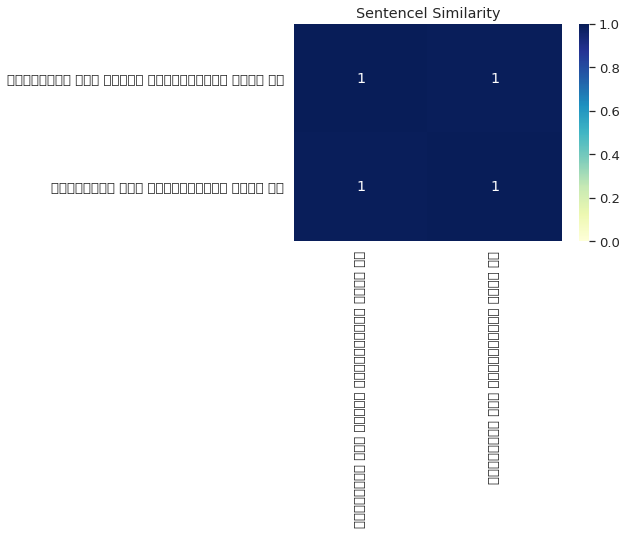

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.font_manager as fm

encoding_matrix = embed_fn(messages)
prop = fm.FontProperties(fname='gdrive/My Drive/Colab Notebooks/kalpurush.ttf')

def plot_similarity(labels, features, rotation):
    corr = np.inner(features, features)
    sns.set(font_scale=1.2)
    g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlGnBu",
      annot=True)
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Sentencel Similarity")

plot_similarity(messages, encoding_matrix, 90)